In [1]:
import uproot
import matplotlib.pyplot as plt
import vector
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import seaborn as sns
import matplotx
from IPython.core.pylabtools import figsize
#sns.set_theme()

plt.style.use(matplotx.styles.github['dark'])


file_nbib = uproot.open('june_29/lctuple_Output_REC_nbib_kh_sk_0.2g.slcio.root')
file_bib  = uproot.open('june_29/lctuple_Output_REC_bib_kh_sk_0.2g.slcio.root')
#file_2  = uproot.concatenate(["may_29th/lctuple_output_REC_bib.000.root", "may_29th/lctuple_output_REC_bib.001.root"], filter_name="'MyLCTuple")
file_nbib

<ReadOnlyDirectory '/' at 0x7fb9858af7c0>

In [49]:
file_bib.keys()

['MyLCTuple;1', 'hEvtProcessingTime;1']

In [50]:
file_bib['MyLCTuple']

<TTree 'MyLCTuple' (190 branches) at 0x7ff6d37b8370>

In [51]:
tree_nbib = file_nbib['MyLCTuple;1']
tree_bib = file_bib['MyLCTuple;1']
#tree.keys()
branches_nbib = tree_nbib.arrays()
branches_bib = tree_bib.arrays()


max(branches_nbib['jmom'][0])
max(branches_bib['jmom'][34])

n_events_nbib = len(branches_nbib['evene']) 
print(n_events_nbib)


100


## Max Jet momentum $p_{J}$ per event

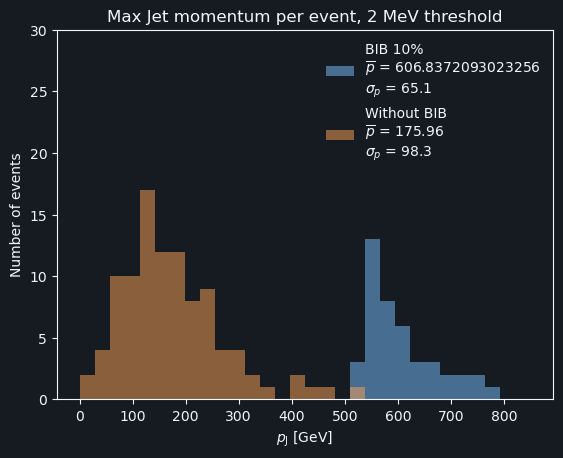

In [52]:
#Array Declaration 

n_events_nbib = len(branches_nbib['evene']) 
n_events_bib = len(branches_bib['evene']) 
jet_p_max_nbib = np.arange(n_events_nbib)
jet_p_max_bib = np.arange(n_events_bib)



for i in range(0, n_events_nbib):
    jet_p_max_nbib[i]=  max(branches_nbib['jmom'][i])
for i in range(0, n_events_bib):    
    jet_p_max_bib[i]=  max(branches_bib['jmom'][i])

#stats calc
mean_nbib = np.mean(jet_p_max_nbib)
mean_bib = np.mean(jet_p_max_bib)

median_nbib = np.median(jet_p_max_nbib)
median_bib = np.median(jet_p_max_bib)

std_nbib = np.std(jet_p_max_nbib)
std_bib = np.std(jet_p_max_bib)


#Plotting 

plt.hist(jet_p_max_bib, bins =30, range=(0,850), alpha =0.5, label = 'BIB 10% \n$\overline{p}$ = ' +str(mean_bib)
                                                                +  '\n$\sigma_{p}$ = ' +str(round(std_bib,1)))
                                                            
                                                                
plt.hist(jet_p_max_nbib, bins =30, range=(0,850), alpha = 0.5, label = 'Without BIB \n$\overline{p}$ = ' +str(mean_nbib)
                                                                +  '\n$\sigma_{p}$ = ' +str(round(std_nbib,1)))
plt.legend(loc='upper right')


plt.xticks(np.arange(0, 850, 100))
plt.yticks(np.arange(0, 31, 5))
plt.xlabel("$p_{\mathrm{J}}$ [GeV]")
plt.ylabel('Number of events')
plt.title('Max Jet momentum per event, 2 MeV threshold')
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/sk_pjet_max_p_overlayed.png')
plt.show()

## Invariant $m$ distribution for all jets in all events

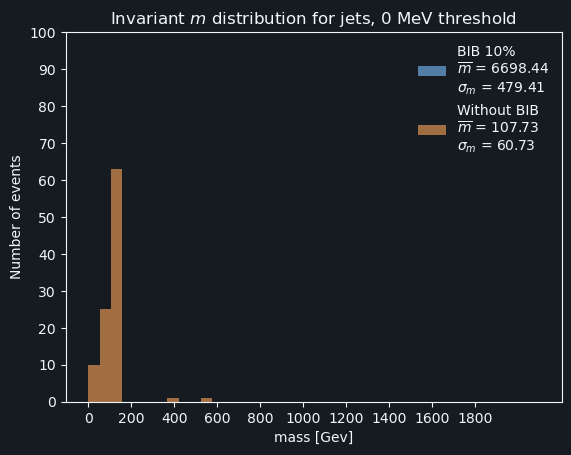

In [53]:
# 4 vector declaration
jet_4v_nbib = vector.zip({'px': branches_nbib['jmox'], 'py': branches_nbib['jmoy'], 'pz': branches_nbib['jmoz'], 'E': branches_nbib['jene']})
jet_4v_bib =vector.zip({'px': branches_bib['jmox'], 'py': branches_bib['jmoy'], 'pz': branches_bib['jmoz'], 'E': branches_bib['jene']})

'''print(jet_4v_nbib[0,1])
print(jet_4v_nbib[0,0])
print(jet_4v_nbib[0,1]+jet_4v_nbib[0,0])
print((jet_4v_nbib[0,1]+jet_4v_nbib[0,0]).mass)'''

'''print(len(jet_4v_bib))
#Jets for No BIB case
event_jet_invmass_4v_nbib = np.empty(len(jet_4v_nbib), np.float64)
for i in range(0, n_events_1): # number of events from 0 to 99
    for j in range(0, branches_1['nj'][i]):
        event_jet_invmass_4v_nbib[i] += jet_4v_nbib[i, j].mass #check this later with the equation 
#print(event_jet_4v_nbib)'''

'''#Jets for BIB case
#event_jet_invmass_4v_bib = np.empty((len(jet_4v_bib),4), np.float64)
for i in range(0, n_events_2): # number of events from 0 to 99
    total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
    #for j in range(0, branches_1['nj'][i]):
        # event_jet_invmass_4v_bib[i] += jet_4v_bib[i, j]
        #total += 
    #print(event_jet_invmass_4v_bib)#check this later with the equation 
#print(event_jet_4v_nbib)'''

#Jets for no BIB case
event_jet_invmass_4v_nbib = np.empty(len(jet_4v_nbib), np.float64)
for i, event in enumerate(jet_4v_nbib):
    total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
    for jet in event:
        total = total + jet
    event_jet_invmass_4v_nbib[i] = total.mass
#print(event_jet_invmass_4v_nbib)

#Jets for BIB case
event_jet_invmass_4v_bib = np.empty(len(jet_4v_bib), np.float64)
#event_jet_pt_4v_bib = np.empty(len(jet_4v_bib), np.float64)
#event_jet_theta_4v_bib = np.empty(len(jet_4v_bib), np.float64)

for i, event in enumerate(jet_4v_bib):
    total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
    for jet in event:
        #print(jet)
        total = total + jet
    event_jet_invmass_4v_bib[i] = total.mass
    #event_jet_pt_4v_bib[i] = total.pt
    
#print(event_jet_invmass_4v_bib)



#Basic Stats 
mean_m_nbib = np.mean(event_jet_invmass_4v_nbib)
std_m_nbib = np.std(event_jet_invmass_4v_nbib)

mean_m_bib = np.mean(event_jet_invmass_4v_bib)
std_m_bib = np.std(event_jet_invmass_4v_bib)

#Plotting 

plt.hist(event_jet_invmass_4v_bib, bins =40, range=(0,  2100), alpha =0.6, label = 'BIB 10%\n$\overline{m}$ = ' +str(round(mean_m_bib,2))
                                                                +  '\n$\sigma_{m}$ = ' +str(round(std_m_bib,2)))
plt.hist(event_jet_invmass_4v_nbib, bins =40, range=(0, 2100), alpha =0.6, label = 'Without BIB \n$\overline{m}$ = ' +str(round(mean_m_nbib,2))
                                                                +  '\n$\sigma_{m}$ = ' +str(round(std_m_nbib,2)))
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 2000,  200))
plt.yticks(np.arange(0, 110, 10))
plt.xlabel("mass [Gev]")
plt.ylabel('Number of events')
plt.title('Invariant $m$ distribution for jets, 0 MeV threshold')
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/sk_invmass_alljets_dstr.png')
plt.show()
        

## $\Theta$ distribution

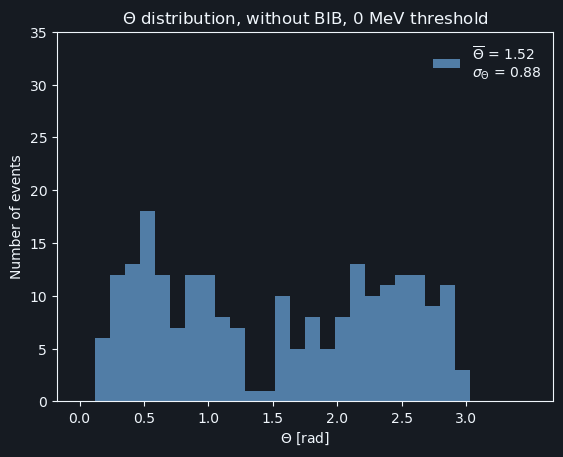

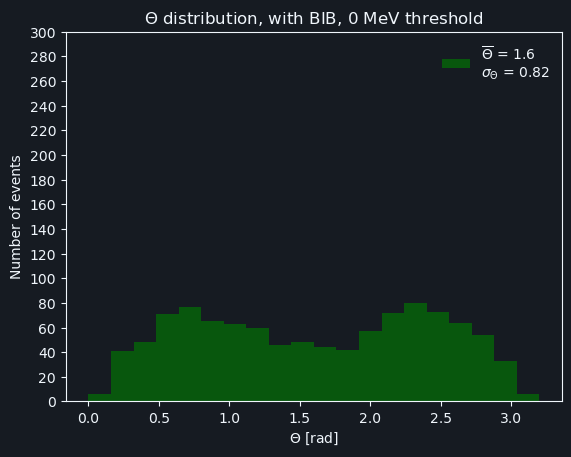

In [54]:
'''jet_theta_ang_nbib = branches_nbib['jTheta']

mean_theta_nbib = np.mean(jet_theta_ang_nbib)
std_theta_nbib = np.std(jet_theta_ang_nbib)'''

theta_vals_nbib= jet_4v_nbib.theta
mean_theta_nbib = np.mean(theta_vals_nbib)
std_theta_nbib = np.std(theta_vals_nbib)


plt.hist(ak.flatten(theta_vals_nbib), bins =30, range=(0,3.5), alpha =0.6, label = '$\overline{\Theta}$ = ' +str(round(mean_theta_nbib,2))
                                                                    +'\n$\sigma_{\Theta}$ = ' + str(round(std_theta_nbib,2)))
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 3.5,  0.5))
plt.yticks(np.arange(0, 40, 5))
plt.xlabel("$\Theta$ [rad]")
plt.ylabel('Number of events')
plt.title('$\Theta$ distribution, without BIB, 0 MeV threshold')
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/nbib_sk_0.2g/theta_dstr_nbib.png')
plt.show()



'''jet_theta_ang_bib = branches_bib['jTheta']
mean_theta_bib = np.mean(jet_theta_ang_bib)
std_theta_bib = np.std(jet_theta_ang_bib)'''
theta_vals_bib= jet_4v_bib.theta
mean_theta_bib = np.mean(theta_vals_bib)
std_theta_bib = np.std(theta_vals_bib)
#print(len(branches_1['jTheta']))
#plt.hist(jet_theta_ang_bib, bins =25, range=(0,3), alpha =0.6, color = 'green', label = '$\overline{\Theta}$ = ' +str(round(mean_theta_bib,2))
                                                                   # +'\n$\sigma_{\Theta}$ = ' + str(round(std_theta_bib,2)))
plt.hist(ak.flatten(theta_vals_bib), bins =20, range=(0,3.2), alpha =0.6, color = 'green', label = '$\overline{\Theta}$ = ' +str(round(mean_theta_bib,2))
                                                                    +'\n$\sigma_{\Theta}$ = ' + str(round(std_theta_bib,2))) 
    
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 3.5,  0.5))
plt.yticks(np.arange(0, 310, 20))
plt.xlabel("$\Theta$ [rad]")
plt.ylabel('Number of events')
plt.title('$\Theta$ distribution, with BIB, 0 MeV threshold')
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/bib10_sk_0.2g_nthres/theta_dstr_bib.png')
plt.show()



## $pT_{J}$ vs $\theta_{J}$ plots (flattened)

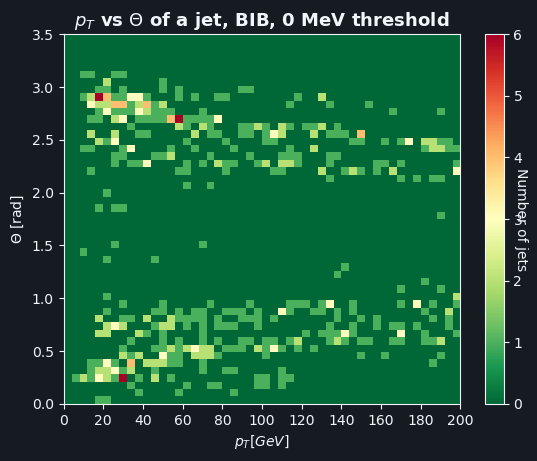

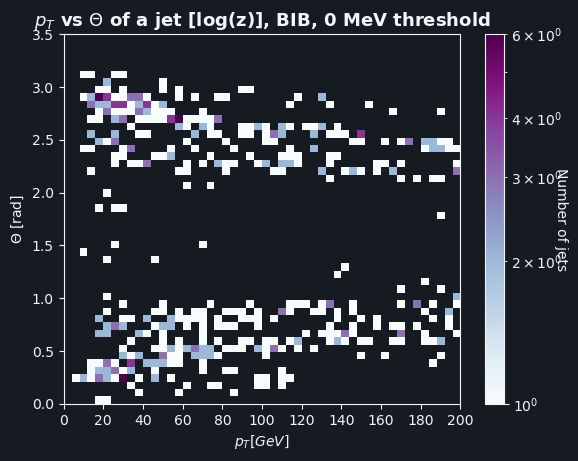

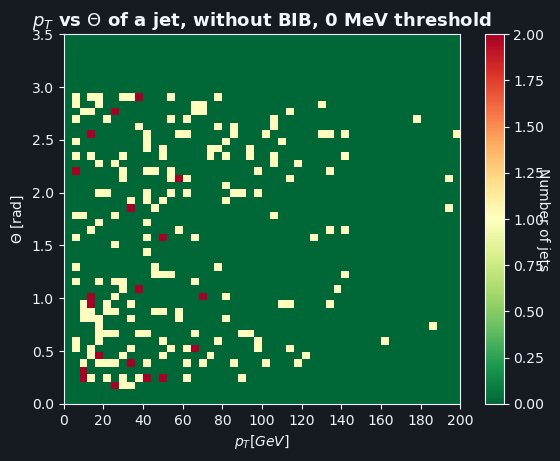

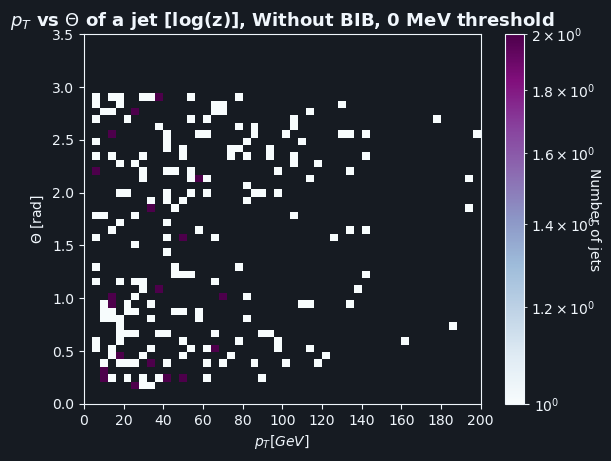

In [55]:
import matplotlib as mpl

#declaring empty storage arrays for pT and theta vals (bib)
event_jet_pT_bib = np.empty(len(jet_4v_bib), np.float64)
event_jet_theta_bib = np.empty(len(jet_4v_bib), np.float64)

#declaring empty storage arrays for pT and theta vals (nbib)
event_jet_pT_nbib = np.empty(len(jet_4v_nbib), np.float64)
event_jet_theta_nbib = np.empty(len(jet_4v_nbib), np.float64)


#Calculating pT and Theta
pT_vals_bib = jet_4v_bib.pt
theta_vals_bib= jet_4v_bib.theta

pT_vals_nbib = jet_4v_nbib.pt
theta_vals_nbib= jet_4v_nbib.theta

#Falttening teh arrays and converting to numpy 
x_bib = ak.to_numpy(ak.flatten(pT_vals_bib))
y_bib = ak.to_numpy(ak.flatten(theta_vals_bib))

x_nbib = ak.to_numpy(ak.flatten(pT_vals_nbib))
y_nbib = ak.to_numpy(ak.flatten(theta_vals_nbib))


#PLotting two histos for BIB case 
plt.hist2d(x_bib, y_bib, bins=(50, 50), range = [[0,200], [0,3.5]], cmap = "RdYlGn_r")
plt.xlabel('$p_{T} [GeV]$')
plt.ylabel("$\Theta$ [rad]")
plt.xticks(np.arange(0, 220,  20))
plt.title('$p_{T}$ vs $\Theta$ of a jet, BIB, 0 MeV threshold',fontweight ='bold', fontsize = 13,)
cbar1= plt.colorbar()
cbar1.set_label('Number of jets', rotation=270)
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/bib10_sk_0.2g_nthres/p_T_theta_bib.png')
plt.show()

plt.hist2d(x_bib, y_bib, bins=(50, 50), range = [[0,200], [0,3.5]], cmap = 'BuPu', norm=mpl.colors.LogNorm())
plt.xlabel('$p_{T} [GeV]$')
plt.ylabel('$\Theta$ [rad]')
plt.xticks(np.arange(0, 220,  20))
plt.title('$p_{T}$ vs $\Theta$ of a jet [log(z)], BIB, 0 MeV threshold',fontsize = 13, fontweight ='bold')
cbar2= plt.colorbar()
cbar2.set_label('Number of jets', rotation=270)
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/bib10_sk_0.2g_nthres/p_T_theta_log_bib.png')
plt.show()

#PLotting two histos for NBIB case:
plt.hist2d(x_nbib, y_nbib, bins=(50, 50), range = [[0,200], [0,3.5]], cmap = "RdYlGn_r")
plt.xlabel('$p_{T} [GeV]$')
plt.ylabel("$\Theta$ [rad]")
plt.xticks(np.arange(0, 220,  20))

plt.title('$p_{T}$ vs $\Theta$ of a jet, without BIB, 0 MeV threshold',fontweight ='bold', fontsize = 13,)
cbar3= plt.colorbar()
cbar3.set_label('Number of jets', rotation=270)
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/nbib_sk_0.2g/p_T_theta_nbib.png')
plt.show()

plt.hist2d(x_nbib, y_nbib, bins=(50, 50), range = [[0,200], [0,3.5]], cmap = 'BuPu', norm=mpl.colors.LogNorm())
plt.xlabel('$p_{T} [GeV]$')
plt.ylabel('$\Theta$ [rad]')
plt.xticks(np.arange(0, 220, 20))
plt.title('$p_{T}$ vs $\Theta$ of a jet [log(z)], Without BIB, 0 MeV threshold',fontsize = 13, fontweight ='bold')
cbar4= plt.colorbar()
cbar4.set_label('Number of jets', rotation=270)
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/nbib_sk_0.2g/p_T_theta_log_nbib.png')
plt.show()






# $p_{J}$ plots (flattened)

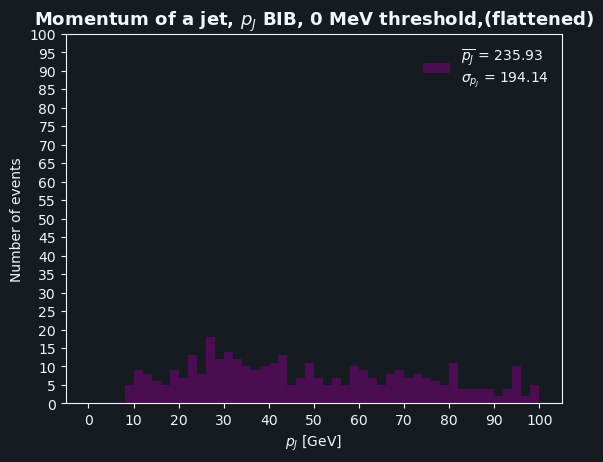

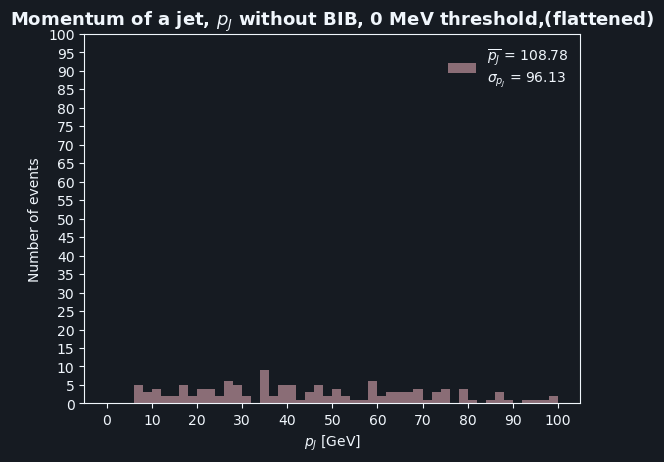

In [56]:


mean_pj_bib_flat = np.mean(ak.flatten(branches_bib['jmom']))
std_pj_bib_flat = np.std(ak.flatten(branches_bib['jmom']))

plt.hist(ak.flatten(branches_bib['jmom']), bins=50, range=(0, 100), alpha = 0.5, color = 'purple',
         label = '$\overline{p_{J}}$ = ' +str(round(mean_pj_bib_flat,2)) +'\n$\sigma_{p_{J}}$ = ' + str(round(std_pj_bib_flat,2)))
plt.xticks(np.arange(0, 110,  10))
plt.yticks(np.arange(0, 105, 5))
                        
plt.title('Momentum of a jet, $p_{J}$ BIB, 0 MeV threshold,(flattened)',fontsize = 13, fontweight ='bold')
plt.xlabel('$p_{J}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/bib10_sk_0.2g_nthres/p_j_flattened_bib.png')
plt.show()

                           
mean_pj_nbib_flat = np.mean(ak.flatten(branches_nbib['jmom']))
std_pj_nbib_flat = np.std(ak.flatten(branches_nbib['jmom']))                          

plt.hist(ak.flatten(branches_nbib['jmom']), bins=50, range=(0, 100), alpha = 0.5, color = 'pink',
                        label = '$\overline{p_{J}}$ = ' +str(round(mean_pj_nbib_flat,2)) +'\n$\sigma_{p_{J}}$ = ' + str(round(std_pj_nbib_flat,2)))
plt.xticks(np.arange(0, 110,  10))
plt.yticks(np.arange(0, 105, 5))

plt.title('Momentum of a jet, $p_{J}$ without BIB, 0 MeV threshold,(flattened)',fontsize = 13, fontweight ='bold')
plt.xlabel('$p_{J}$ [GeV]')
plt.ylabel('Number of events')
plt.legend(loc='upper right')
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/nbib_sk_0.2g/p_j_flattened_nbib.png')
plt.show()

# $\phi$ distribution

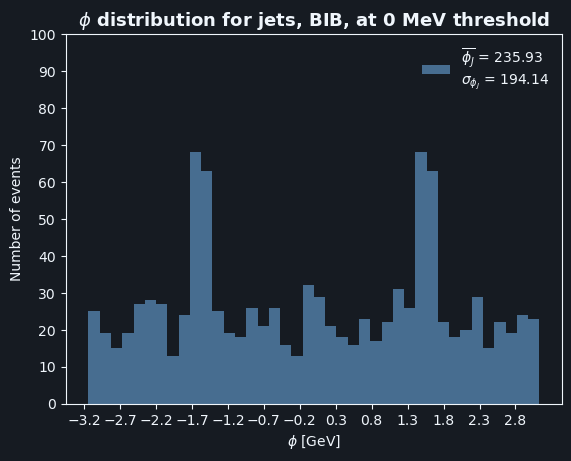

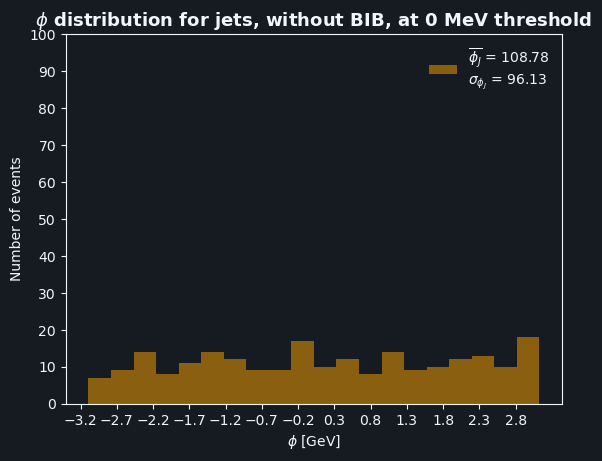

In [57]:
#declaring empty storage arrays for pT and theta vals (bib)
event_jet_phi_bib = np.empty(len(jet_4v_bib), np.float64)

#declaring empty storage arrays for pT and theta vals (nbib)
event_jet_phi_nbib = np.empty(len(jet_4v_nbib), np.float64)


#Calculating pT 
phi_vals_bib = jet_4v_bib.phi

phi_vals_nbib = jet_4v_nbib.phi

#Falttening the arrays and converting to numpy 
phi_bib_flat = ak.to_numpy(ak.flatten(phi_vals_bib))
#y_bib = ak.to_numpy(ak.flatten(theta_vals_bib))

phi_nbib_flat = ak.to_numpy(ak.flatten(phi_vals_nbib))
#y_nbib = ak.to_numpy(ak.flatten(theta_vals_nbib))


#stats
mean_phi_bib_flat = np.mean(phi_bib_flat)
std_phi_bib_flat = np.std(phi_bib_flat)

mean_phi_nbib_flat = np.mean(phi_nbib_flat)
std_phi_nbib_flat = np.std(phi_nbib_flat)

#PLotting two histos for BIB case 
#plt.hist2d(x_bib, y_bib, bins=(50, 50), range = [[0,100], [0,3.5]], cmap = "RdYlGn_r")
plt.hist(phi_bib_flat, bins= 40, alpha = 0.5, label = '$\overline{\phi_{J}}$ = ' +str(round(mean_pj_bib_flat,2)) 
                                                  +'\n$\sigma_{\phi_{J}}$ = ' + str(round(std_pj_bib_flat,2))) 
plt.xlabel('$\phi$ [GeV]')
plt.ylabel("Number of events")
plt.xticks(np.arange(-3.2, 3.2,  0.5))
plt.yticks(np.arange(0, 110,  10))
plt.legend(loc='upper right')
plt.title('$\phi$ distribution for jets, BIB, at 0 MeV threshold',fontweight ='bold', fontsize = 13,)
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/bib10_sk_0.2g_nthres/phi_dstr_bib_thres001.png')
plt.show()



plt.hist(phi_nbib_flat, bins= 20, alpha = 0.5, color= 'orange', label = '$\overline{\phi_{J}}$ = ' +str(round(mean_pj_nbib_flat,2)) 
                                                  +'\n$\sigma_{\phi_{J}}$ = ' + str(round(std_pj_nbib_flat,2))) 
plt.xlabel('$\phi$ [GeV]')
plt.ylabel("Number of events")
plt.xticks(np.arange(-3.2, 3.2,  0.5))
plt.yticks(np.arange(0, 110,  10))
plt.legend(loc='upper right')
plt.title('$\phi$ distribution for jets, without BIB, at 0 MeV threshold',fontweight ='bold', fontsize = 13)
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/nbib_sk_0.2g/phi_dstr_nbib_thres001.png')
plt.show()
#cbar1= plt.colorbar()
#cbar1.set_label('Number of jets', rotation=270)

# $\phi_{j}$ vs $\theta_{j}$ plot 

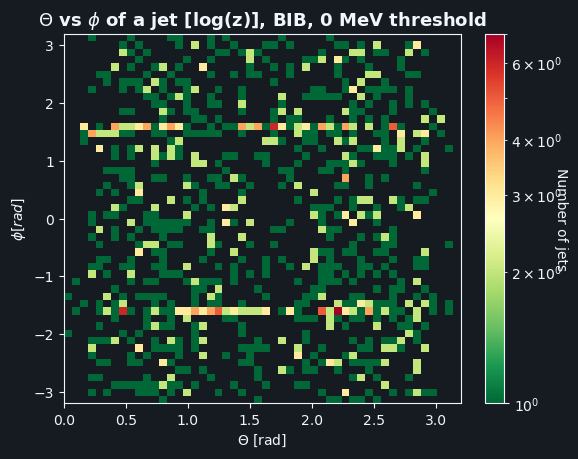

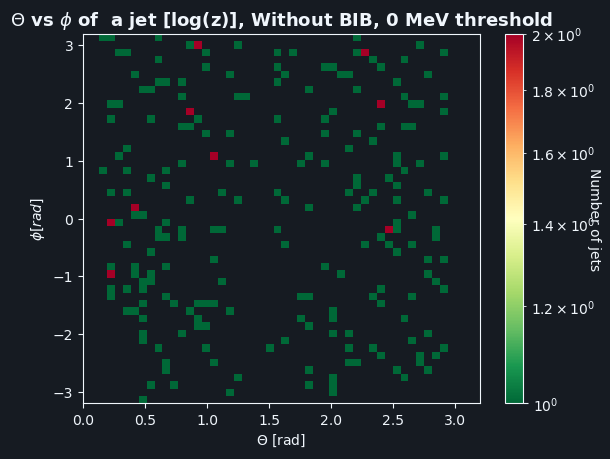

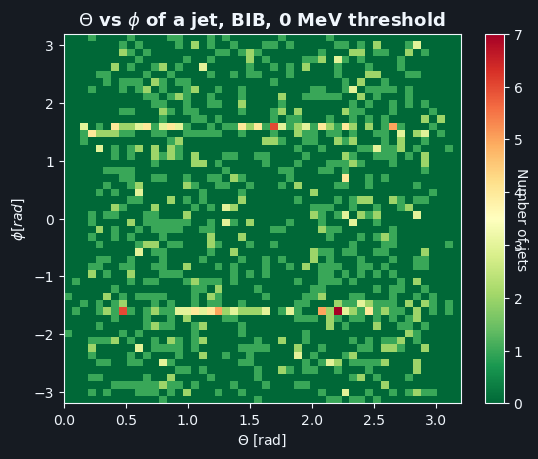

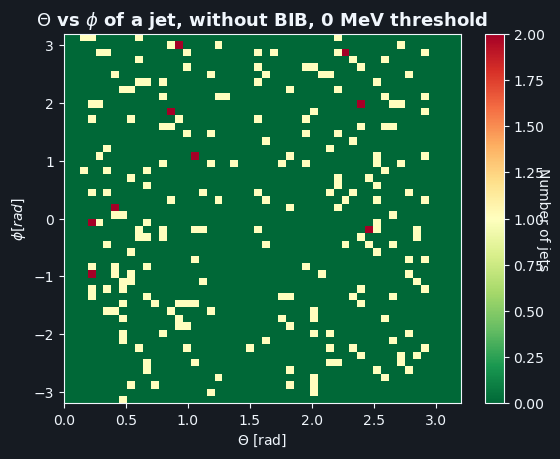

In [58]:


#Logged for BIB
plt.hist2d(y_bib, phi_bib_flat, bins=(50, 50), range = [[0,3.2], [-3.2,3.2]], cmap = "RdYlGn_r", norm=mpl.colors.LogNorm())
plt.ylabel('$\phi [rad]$')
plt.xlabel('$\Theta$ [rad]')
plt.xticks(np.arange(0, 3.2,  0.5))
plt.title('$\Theta$ vs $\phi$ of a jet [log(z)], BIB, 0 MeV threshold',fontsize = 13, fontweight ='bold')
cbar4= plt.colorbar()
cbar4.set_label('Number of jets', rotation=270)
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/bib10_sk_0.2g_nthres/phi_theta_log_bib_log.png')
plt.show()



#Logged for NBIB
plt.hist2d(y_nbib, phi_nbib_flat, bins=(50, 50), range = [[0,3.2], [-3.2,3.2]], cmap = "RdYlGn_r", norm=mpl.colors.LogNorm())
plt.ylabel('$\phi [rad]$')
plt.xlabel('$\Theta$ [rad]')
plt.xticks(np.arange(0, 3.2, 0.5 ))
plt.title('$\Theta$ vs $\phi$ of  a jet [log(z)], Without BIB, 0 MeV threshold',fontsize = 13, fontweight ='bold')
cbar4= plt.colorbar()
cbar4.set_label('Number of jets', rotation=270)
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/nbib_sk_0.2g/phi_theta_log_nbib_log.png')
plt.show()

#For BIB
plt.hist2d(y_bib, phi_bib_flat, bins=(50, 50), range = [[0,3.2], [-3.2,3.2]], cmap = "RdYlGn_r")
plt.ylabel('$\phi [rad]$')
plt.xlabel('$\Theta$ [rad]')
plt.xticks(np.arange(0, 3.2,  0.5))
plt.title('$\Theta$ vs $\phi$ of a jet, BIB, 0 MeV threshold',fontsize = 13, fontweight ='bold')
cbar4= plt.colorbar()
cbar4.set_label('Number of jets', rotation=270)
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/bib10_sk_0.2g_nthres/phi_theta_log_bib.png')
plt.show()

#For NBIB
plt.hist2d(y_nbib, phi_nbib_flat, bins=(50, 50), range = [[0,3.2], [-3.2,3.2]], cmap = "RdYlGn_r")
plt.ylabel('$\phi [rad]$')
plt.xlabel('$\Theta$ [rad]')
plt.xticks(np.arange(0, 3.2,  0.5))
plt.title('$\Theta$ vs $\phi$ of a jet, without BIB, 0 MeV threshold',fontsize = 13, fontweight ='bold')
cbar4= plt.colorbar()
cbar4.set_label('Number of jets', rotation=270)
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/nbib_sk_0.2g/phi_theta_log_nbib.png')
plt.show()



In [59]:
print(branches_nbib['nj']) #nbib
print(branches_bib['nj'])


[2, 2, 2, 1, 2, 4, 2, 1, 2, 2, 2, 3, 2, ..., 2, 2, 4, 1, 2, 2, 3, 2, 3, 2, 2, 2]
[25, 25, 27, 22, 23, 26, 24, 24, 25, ..., 24, 25, 23, 25, 24, 29, 23, 25, 24]


## Distribution of Two leading jet momenta per event 

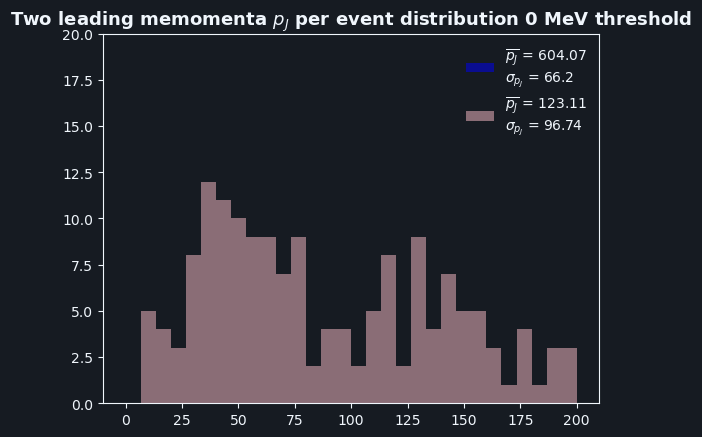

'print(jet_p_max_bib)\nprint(branches_bib[\'jmom\'])\nprint("sorted")\nprint(jet_p_sorted_bib)\n\n#print(two_lead_p_part)'

In [60]:
#Array Declaration 
from matplotlib.ticker import MultipleLocator
n_events_nbib = len(branches_nbib['evene']) 
n_events_bib = len(branches_bib['evene']) 
jet_p_max_nbib = np.arange(n_events_nbib)
jet_p_max_bib = np.arange(n_events_bib)



#two_leading_p = np.partition(branches_nbib['jmom'], -2, axis=1)[:, -2]
jet_p_sorted_bib = ak.sort(branches_bib['jmom'], ascending=False)[:,0:2]
jet_p_sorted_nbib = ak.sort(branches_nbib['jmom'], ascending=False)[:,0:2]

mean_p_sorted_bib = np.mean(jet_p_sorted_bib) 
std_p_sorted_bib = np.std(jet_p_sorted_bib) 

mean_p_sorted_nbib = np.mean(jet_p_sorted_nbib) 
std_p_sorted_nbib = np.std(jet_p_sorted_nbib) 


plt.hist(ak.flatten(jet_p_sorted_bib), bins=50, range=(0, 200), alpha = 0.5, color = 'blue', label = '$\overline{p_{J}}$ = ' +str(round(mean_p_sorted_bib,2)) 
                                                  +'\n$\sigma_{p_{J}}$ = ' + str(round(std_p_sorted_bib,2)))

plt.hist(ak.flatten(jet_p_sorted_nbib), bins=30, range=(0, 200), alpha = 0.5, color = 'pink', label = '$\overline{p_{J}}$ = ' +str(round(mean_p_sorted_nbib,2)) 
                                                  +'\n$\sigma_{p_{J}}$ = ' + str(round(std_p_sorted_nbib,2)))
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 200, 25), minor = True)
plt.yticks(np.arange(0, 25, 5), minor = True)

ml = MultipleLocator(5)
#plt.axes().xaxis.set_minor_locator(ml)
#plt.axes().xaxis.set_tick_params(which='minor', right = 'off')

plt.title('Two leading memomenta $p_{J}$ per event distribution 0 MeV threshold',fontsize = 13, fontweight ='bold')
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/sk_leading_momenta_dstr.png')
plt.show()
#two_lead_p_part = np.partition(jet_p_sorted_bib, -2, axis=1)[:, -2]
'''for i in range(0, n_events_bib):    
    jet_p_max_bib[i]=  max(branches_bib['jmom'][i])'''


'''print(jet_p_max_bib)
print(branches_bib['jmom'])
print("sorted")
print(jet_p_sorted_bib)

#print(two_lead_p_part)'''


In [61]:
jet_4v_bib[0,0] + jet_4v_bib[0,1]

<MomentumRecord4D {x: 2.07, y: 83.9, z: 411, t: 360} type='Momentum4D[x: fl...'>

## Invariant $m$ distribution for two leading jets

[[565, 523], [537, 506], [773, 628], ..., [652, ...], [587, 550], [595, 592]]


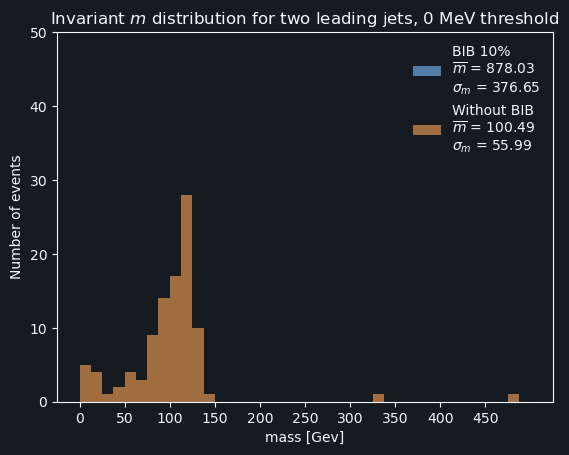

In [62]:
import math as math 
event_2jet_invmass_4v_bib = np.empty(len(jet_4v_bib), np.float64)
event_2jet_invmass_4v_nbib = np.empty(len(jet_4v_nbib), np.float64)
# momentum filter 
jet_4v_bib_pmask = ak.sort(jet_4v_bib.p, ascending=False)[:,0:2]
jet_4v_nbib_pmask = ak.sort(jet_4v_nbib.p, ascending=False)[:,0:2]

print(jet_4v_bib_pmask)

#BIB case
for i, event in enumerate(jet_4v_bib):
    total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
    for jet in event:
        p = math.trunc(jet.p)
        #print(p)
        #print(math.trunc(int(jet_4v_bib_pmask[i,0])))
        if p == math.trunc(int(jet_4v_bib_pmask[i,0])) or p == math.trunc(int(jet_4v_bib_pmask[i,1])):
            total = total + jet
        else:
            continue
    event_2jet_invmass_4v_bib[i] = total.mass
    #print(event_2jet_invmass_4v_bib[i])
    
# NBIB case 
for i, event in enumerate(jet_4v_nbib):
    total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
    for jet in event:
        p = math.trunc(jet.p)
        #print(p)
        #print(math.trunc(int(jet_4v_bib_pmask[i,0])))
        if p == math.trunc(int(jet_4v_nbib_pmask[i,0])) or p == math.trunc(int(jet_4v_nbib_pmask[i,1])):
            total = total + jet
        else:
            continue
    event_2jet_invmass_4v_nbib[i] = total.mass

#Basic Stats 
mean_m_2j_nbib = np.mean(event_2jet_invmass_4v_nbib)
std_m_2j_nbib = np.std(event_2jet_invmass_4v_nbib)

mean_m_2j_bib = np.mean(event_2jet_invmass_4v_bib)
std_m_2j_bib = np.std(event_2jet_invmass_4v_bib)

#Plotting 

plt.hist(event_2jet_invmass_4v_bib, bins =50, range=(0, 500), alpha =0.6, label = 'BIB 10%\n$\overline{m}$ = ' +str(round(mean_m_2j_bib,2))
                                                                +  '\n$\sigma_{m}$ = ' +str(round(std_m_2j_bib,2)))
plt.hist(event_2jet_invmass_4v_nbib, bins =40, range=(0,500), alpha =0.6, label = 'Without BIB \n$\overline{m}$ = ' +str(round(mean_m_2j_nbib,2))
                                                                +  '\n$\sigma_{m}$ = ' +str(round(std_m_2j_nbib,2)))
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 500, 50))
plt.yticks(np.arange(0, 60, 10))
plt.xlabel("mass [Gev]")
plt.ylabel('Number of events')
plt.title('Invariant $m$ distribution for two leading jets, 0 MeV threshold')
plt.savefig('/Users/khurriccan/Desktop/muon_collider_root/june_29/plots/sk_invmass_twojets_dstr.png')
plt.show()
        


In [63]:
import numpy as np
# create a 5x5 array with random values
nums = np.random.rand(5, 5)
print("Original array elements:")
print(nums)
# find the second-largest value in each row
second_largest = np.partition(nums, -1, axis=1)[:, -2]
second_largest_t = np.partition(nums, -1, axis=1)
second_largest_sort = np.sort(nums)
print("\nSecond-largest value in each row:")
print(second_largest)
print("sorted")
print(second_largest_t)
print("sorted descending")
print(second_largest_sort)

Original array elements:
[[0.27393321 0.60168443 0.0943842  0.51090694 0.95904735]
 [0.0044428  0.3062489  0.59916534 0.96122449 0.82221589]
 [0.30625079 0.22998698 0.34460532 0.41954237 0.95855151]
 [0.94104838 0.98421485 0.57207895 0.52231161 0.00492229]
 [0.18379149 0.24384748 0.50335564 0.60299537 0.10862399]]

Second-largest value in each row:
[0.51090694 0.82221589 0.41954237 0.52231161 0.10862399]
sorted
[[0.27393321 0.60168443 0.0943842  0.51090694 0.95904735]
 [0.0044428  0.3062489  0.59916534 0.82221589 0.96122449]
 [0.30625079 0.22998698 0.34460532 0.41954237 0.95855151]
 [0.94104838 0.00492229 0.57207895 0.52231161 0.98421485]
 [0.18379149 0.24384748 0.50335564 0.10862399 0.60299537]]
sorted descending
[[0.0943842  0.27393321 0.51090694 0.60168443 0.95904735]
 [0.0044428  0.3062489  0.59916534 0.82221589 0.96122449]
 [0.22998698 0.30625079 0.34460532 0.41954237 0.95855151]
 [0.00492229 0.52231161 0.57207895 0.94104838 0.98421485]
 [0.10862399 0.18379149 0.24384748 0.5033556